<a href="https://colab.research.google.com/github/pedrecho/scrap_news/blob/main/codeforces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

In [21]:
link = 'https://codeforces.com/problemset'
html = requests.get(link).text

In [22]:
from bs4 import BeautifulSoup

In [25]:
soup = BeautifulSoup(html, "html.parser")
# print(soup)

In [110]:
tasks = soup.find('table', class_='problems').findAll('tr')
print(len(tasks))

101


In [92]:
import pandas as pd

In [104]:
i = 0
line = []
for item in tasks[1:]:
  td = item.findAll('td')
  line.append([0] * 6)
  line[i][0] = td[0].a.text.strip('\r\n ')
  line[i][1] = td[1].div.a.text.strip('\r\n ')
  line[i][2] = list(map(lambda x: x.text, td[1].findAll('div')[1].findAll('a')))
  if td[3].span is None:
    line[i][3] = None
  else:
    line[i][3] = int(td[3].span.text)
  line[i][4] = int(td[4].a.text.strip('\xa0x'))
  line[i][5] = td[0].a['href']
  print(line[i])
  i += 1

['1620G', 'Subsequences Galore', ['bitmasks', 'combinatorics', 'dp', 'math'], None, 188, '/problemset/problem/1620/G']
['1620F', 'Bipartite Array', ['dp'], None, 56, '/problemset/problem/1620/F']
['1620E', 'Replace the Numbers', ['data structures', 'dsu', 'trees'], None, 2764, '/problemset/problem/1620/E']
['1620D', 'Exact Change', ['brute force', 'constructive algorithms', 'greedy', 'implementation'], None, 1317, '/problemset/problem/1620/D']
['1620C', 'BA-String', ['brute force', 'dp', 'greedy', 'implementation', 'math'], None, 2479, '/problemset/problem/1620/C']
['1620B', 'Triangles on a Rectangle', ['geometry', 'greedy', 'math'], None, 9573, '/problemset/problem/1620/B']
['1620A', 'Equal or Not Equal', ['constructive algorithms', 'implementation'], None, 11642, '/problemset/problem/1620/A']
['1618G', 'Trader Problem', ['binary search', 'data structures', 'dsu', 'greedy', 'sortings'], 2200, 530, '/problemset/problem/1618/G']
['1618F', 'Reverse', ['bitmasks', 'constructive algorithms

In [109]:
df = pd.DataFrame(line, columns=('Number', 'Name', 'Tags', 'Difficulty', 'Solutions', 'Link'))
df.sample(5)

,Number,Name,Tags,Difficulty,Solutions,Link
6,1620A,Equal or Not Equal,"[constructive algorithms, implementation]",NaN,11642,/problemset/problem/1620/A
49,1610G,AmShZ Wins a Bet,"[data structures, greedy, hashing]",3300.0,80,/problemset/problem/1610/G
23,1614C,Divan and bitwise operations,"[bitmasks, combinatorics, constructive algorit...",1500.0,5969,/problemset/problem/1614/C
54,1610B,Kalindrome Array,"[greedy, two pointers]",1100.0,9526,/problemset/problem/1610/B
33,1612F,Armor and Weapons,"[brute force, dp, greedy, shortest paths]",2800.0,301,/problemset/problem/1612/F


In [111]:
import matplotlib.pyplot as plt

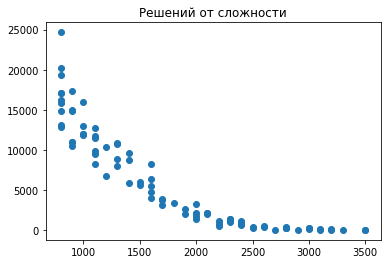

In [112]:
plt.title('Решений от сложности')
plt.scatter(df['Difficulty'], df['Solutions'])
plt.show()

In [113]:
df.to_csv("codeforces.csv", index=False)